<a href="https://colab.research.google.com/github/Sreelakshmim6/CE888/blob/main/Lab_5/bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define our actions

def action_0():
    return np.random.choice([1, 0], p=[0.5, 0.5])

def action_1():
    return np.random.choice([1, 0], p=[0.6, 0.4])

def action_2():
    return np.random.choice([1, 0], p=[0.2, 0.8])

rewards = [action_0, action_1, action_2]

In [3]:
for i in range(10):
    print('Pull %d (action_0): reward=%d' % (i, rewards[0]()))

Pull 0 (action_0): reward=0
Pull 1 (action_0): reward=0
Pull 2 (action_0): reward=0
Pull 3 (action_0): reward=1
Pull 4 (action_0): reward=1
Pull 5 (action_0): reward=1
Pull 6 (action_0): reward=1
Pull 7 (action_0): reward=1
Pull 8 (action_0): reward=1
Pull 9 (action_0): reward=1


In [4]:
# Simulate action values (Q): expected reward for each action
pulls = 100000

action_values = []
for reward in rewards:
    value = [reward() for _ in range(pulls)]  # execute each of the actions 'pulls' times
    action_values.append(value)

for action, value in enumerate(action_values):
    print("Action %d: Q(a_%d)=%.2f" % (action, action, np.mean(value)))

Action 0: Q(a_0)=0.50
Action 1: Q(a_1)=0.60
Action 2: Q(a_2)=0.20


In [5]:
# To simulate the values (V), we need to define a policy
# (Value is the expected reward given the policy I'm following)

# Define a policy:
def policy_random():
    '''Returns which action to perform using equal probabilities for each action'''
    return np.random.choice([0, 1, 2], p=[1/3, 1/3, 1/3])


def policy_better():
    ''' A better policy than random: we choose actions 0 and 1 more often than action 2'''
    return np.random.choice([0, 1, 2], p=[0.4, 0.5, 0.1])


In [6]:
# Simulate Values using the random policy
total_reward = 0
for pull in range(pulls):
    action = policy_random()
    total_reward += rewards[action]()
print("Total reward =", total_reward)
print("Average reward: V =", total_reward/pulls)

Total reward = 43282
Average reward: V = 0.43282


In [7]:
# Simulate Values using the better policy
total_reward = 0
for pull in range(pulls):
    action = policy_better()
    total_reward += rewards[action]()
print("Total reward =", total_reward)
print("Average reward: V =", total_reward/pulls)

Total reward = 52085
Average reward: V = 0.52085


In [8]:
# Regret of the better policy
V_star = max([np.mean(value) for value in action_values])
print("V* =", V_star)

total_regret = 0
for pull in range(pulls):
    total_regret += (V_star - rewards[policy_better()]())
print('Regret: I_t = %.2f' % (total_regret/pulls))

V* = 0.59852
Regret: I_t = 0.08


In [9]:
# Some bandit policies to explore:

def policy_greedy(action_values):
    '''Always returns the action for which the payoff is highest'''
    best_action = np.argmax([np.mean(value) for value in action_values])
    return best_action


def policy_e_greedy(action_values, epsilon=0.05):
    '''We explore with epsilon probability, and choose the best action the rest of the time'''
    explore = np.random.choice([1, 0], p=[epsilon, 1-epsilon])
    if explore:
        # Random action
        return policy_random()
    else:
        # Choose best action
        return policy_greedy(action_values)



In [10]:
# Implementing the decaying epsilon-greedy properly requires a class definition so we can store the epsilon values
class DecayingEGreedy:
    
    def __init__(self, epsilon, decay=0.99, lower_bound=0):
        self.epsilon = epsilon
        self.decay = decay
        self.lower_bound = lower_bound
        
    def policy(self, action_values):
        if self.lower_bound > 0 and self.epsilon > self.lower_bound:
            self.epsilon *= self.decay  # update epsilon
        explore = np.random.choice([1, 0], p=[self.epsilon, 1-self.epsilon])  # explore vs exploit decision
        if explore:
            # Random action
            return policy_random()
        else:
            # Choose best action
            return policy_greedy(action_values)


In [11]:
# Let's test the decaying epsilon-greedy approach
agent = DecayingEGreedy(epsilon=0.1, decay=0.99, lower_bound=0.03)

# Full problem:
action_values = [[], [], []] # initialise values
rewards_decaying_e_greedy = []
total_reward = 0
print('Number of pulls\t\tTotal reward\t\tV')
for pull in range(pulls):
    action = agent.policy(action_values)  # choose action according to policy
    reward = rewards[action]()  # get reward
    action_values[action].append(reward)  # update action_values so we make better decisions down the line
    total_reward += reward
    if (pull+1) % 1000 == 0:
        print('%d\t\t\t%d\t\t\t%.3f' % (pull+1, total_reward, total_reward/pull))
        rewards_decaying_e_greedy.append(total_reward/pull)



Number of pulls		Total reward		V
1000			593			0.594


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2000			1191			0.596
3000			1758			0.586
4000			2337			0.584
5000			2939			0.588
6000			3533			0.589
7000			4140			0.592
8000			4744			0.593
9000			5340			0.593
10000			5938			0.594
11000			6560			0.596
12000			7132			0.594
13000			7707			0.593
14000			8286			0.592
15000			8897			0.593
16000			9484			0.593
17000			10084			0.593
18000			10670			0.593
19000			11269			0.593
20000			11891			0.595
21000			12481			0.594
22000			13084			0.595
23000			13671			0.594
24000			14275			0.595
25000			14848			0.594
26000			15473			0.595
27000			16064			0.595
28000			16678			0.596
29000			17248			0.595
30000			17838			0.595
31000			18445			0.595
32000			19053			0.595
33000			19661			0.596
34000			20252			0.596
35000			20853			0.596
36000			21433			0.595
37000			22027			0.595
38000			22605			0.595
39000			23202			0.595
40000			23786			0.595
41000			24380			0.595
42000			24951			0.594
43000			25552			0.594
44000			26157			0.594
45000			26745			0.594
46000			27330			0.594
47000			27923			0.594
48000			285

Text(0, 0.5, 'Average reward (V)')

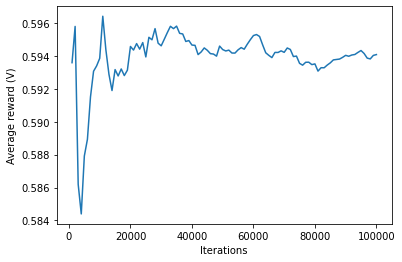

In [12]:
plt.plot(np.arange(1000, pulls+1, step=1000), rewards_decaying_e_greedy)
plt.xlabel("Iterations")
plt.ylabel("Average reward (V)")
# The average reward is 0.594, which is very close to V* (0.6)!

In [13]:
# Implementing the decaying epsilon-greedy properly requires a class definition so we can store the epsilon values
class UCB:
    
    def __init__(self, C=0.5, n_arms=3):
        self.C = C
        self.pulls = 0
        self.counts = np.asarray([0] * n_arms)
        
    def update_counts(self, arm):
        self.pulls += 1
        self.counts[arm] += 1
        
    def policy(self, action_values):
        action_values = np.asarray([np.mean(value) for value in action_values])
        uncertainty = np.sqrt(np.log(self.pulls) / self.counts)
        ucb = action_values + self.C * uncertainty
        action = np.argmax(ucb)
        self.update_counts(action)
        return action


In [ ]:
# Let's test the decaying epsilon-greedy approach
agent = UCB(C=0.5)

# Full problem:
action_values = [[], [], []] # initialise values
total_reward = 0 # reset reward
rewards_ucb = []
print('Number of pulls\t\tTotal reward\t\tV')
for pull in range(pulls):
    action = agent.policy(action_values)  # choose action according to policy
    reward = rewards[action]()  # get reward
    action_values[action].append(reward)  # update action_values so we make better decisions down the line
    total_reward += reward
    if (pull+1) % 1000 == 0:
        print('%d\t\t\t%d\t\t\t%.3f' % (pull+1, total_reward, total_reward/pull))
        rewards_ucb.append(total_reward/pull)


Number of pulls		Total reward		V
1000			556			0.557


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


2000			1170			0.585
3000			1780			0.594
4000			2389			0.597
5000			3010			0.602
6000			3600			0.600
7000			4184			0.598
8000			4779			0.597
9000			5392			0.599
10000			5998			0.600
11000			6586			0.599
12000			7148			0.596
13000			7741			0.596
14000			8350			0.596
15000			8946			0.596
16000			9552			0.597
17000			10132			0.596
18000			10744			0.597
19000			11369			0.598
20000			11984			0.599
21000			12583			0.599
22000			13186			0.599
23000			13773			0.599
24000			14348			0.598
25000			14938			0.598
26000			15535			0.598
27000			16131			0.597
28000			16700			0.596
29000			17295			0.596
30000			17918			0.597
31000			18537			0.598
32000			19162			0.599
33000			19780			0.599
34000			20368			0.599
35000			20984			0.600
36000			21614			0.600
37000			22223			0.601
38000			22818			0.600
39000			23423			0.601
40000			24018			0.600
41000			24584			0.600
42000			25161			0.599
43000			25761			0.599
44000			26365			0.599
45000			26944			0.599
46000			27543			0.599
47000			28151			0.599
48000			287

In [ ]:
plt.plot(np.arange(1000, pulls+1, step=1000), rewards_ucb)
plt.xlabel("Iterations")
plt.ylabel("Average reward (V)")